In [2]:
import pandas as pd
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
pd.__version__

u'0.18.1'

In [3]:
%matplotlib inline

In [4]:
data=pd.read_csv("inoculation.csv", header=None)
data.head()

,0,1
0,5.0,5.00
1,6.0,4.50
2,7.4,4.00
3,9.0,3.57
4,10.0,3.36


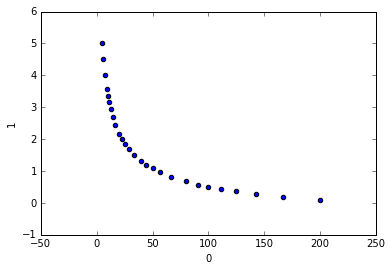

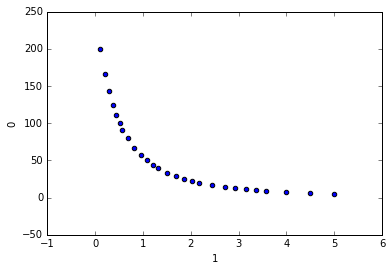

In [7]:
df = pd.DataFrame(data)
df.plot.scatter(x=0, y=1)
df.plot.scatter(x=1, y=0)

In [22]:
def fitfunc(p, x):
    return p[0] + p[1] * np.power(x, p[2])


def errfunc(p, x, y):
    return y - fitfunc(p, x)

In [51]:
def get_equation(xdata, ydata, estimate):

    qout, cov, infodict, mesg, ier = optimize.leastsq(errfunc,
                                                      estimate,
                                                      args=(xdata, ydata),
                                                      maxfev=1000,
                                                      full_output=True)

    out = qout[:]
    out[0] = qout[0]
    out[1] = qout[1]
    out[2] = qout[2]
    print("a = {:0.6f}, b = {:0.6f}, c = {:0.6f}".format(out[0], out[1], out[2]))
    print("{:0.6f} + {:0.6f} * x ^ {:0.6f}".format(out[0], out[1], out[2]))

    ss_err = (infodict['fvec'] ** 2).sum()
    ss_tot = ((ydata - ydata.mean()) ** 2).sum()
    rsquared = 1 - (ss_err / ss_tot)
    print("R2: {:0.6f}".format(rsquared))
    return qout

In [52]:
def graph(xdata, xlim, ydata, ylim, fn=fitfunc):
    xp = np.linspace(*xlim, num=1500)
    pxp = fn(qout, xp)

    plt.plot(xdata, ydata, '.', xp, pxp, '-')
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xlabel('x')
    plt.ylabel('y', rotation='horizontal')
    plt.grid(True)
    plt.show()

In [53]:
xdata = df[0]
ydata = df[1]

qout = get_equation(xdata, ydata, [max(ydata), -1, -0.46])

a = -0.999499, b = 12.547938, c = -0.459486
-0.999499 + 12.547938 * x ^ -0.459486
R2: 0.999990


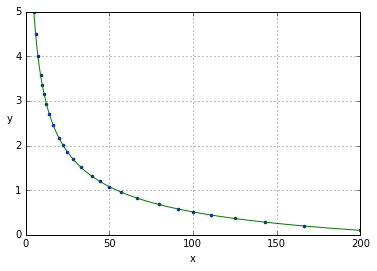

In [54]:
graph(xdata, [0, 200], ydata, [0, 5])

In [55]:
def new_fit_func(qout, x):
    a, b, c = qout
    return np.power(10, np.log10(b/(x-a))/-c)

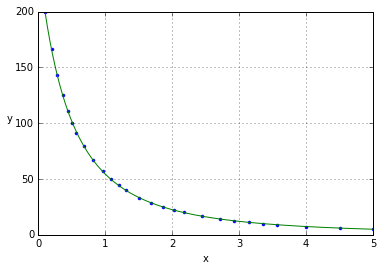

In [56]:
xdata = df[1]
ydata = df[0]
graph(xdata, [0, 5], ydata, [0, 200], fn=new_fit_func)

In [57]:
x = np.array([2.22, 4.44])
xout = new_fit_func(qout, x)
print(xout)
print(fitfunc(qout, xout))

[ 19.3085734    6.16655591]
[ 2.22  4.44]
